# Sampling Distributions

__Agenda__

- Difference between population and sample
- How can we get a good sample?
- Point estimators from sample
- Sampling distribution, especially sampling distribution of the mean
- Central Limit Theorem - statement and use of it.
- Recap

## Population vs Sample

__population__ A population is the set of all elements of interest in a study. (Finite population and infinite population)

__sample__ A sample is a subset of the population.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.

__Objective of Sampling__

When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.

Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population


<img src = "./img/sample_pop.png" width = 500/>

**Random sampling is not easy to do, let's look at an example:**

- [1936 Elections](https://www.math.upenn.edu/~deturck/m170/wk4/lecture/case1.html)

- [US Census](https://www.math.upenn.edu/~deturck/m170/wk4/lecture/case3.html)

- [Covid-19](https://www.nbcnewyork.com/news/local/new-york-virus-deaths-top-15k-cuomo-expected-to-detail-plan-to-fight-nursing-home-outbreaks/2386556/)





__Note:__

We can consider random sampling as an 'random experiment' and then when we calculate mean, variance, standard deviation, median etc. these are functions on the outcomes of this experiment. We have a name for such functions can you remember it?

## Point Estimates

In statistics, point estimation involves the use of sample data to calculate a single value (known as a point estimate since it identifies a point in some parameter space) which is to serve as a "best guess" or "best estimate" of an unknown population parameter (for example, the population mean). More formally, it is the application of a point estimator to the data to obtain a point estimate. 


<img src = './img/sample_stats.png' width = 450/>

### It's your turn :)

[Barcelona Accidents](https://github.com/DataScienceUB/introduction-datascience-python-book)

This notebook is inspired from chapter 4 of : [Introduction to Datascience](https://github.com/DataScienceUB/introduction-datascience-python-book)

***mu = population mean

***x_bar = sample mean***

***sigma = standard deviation of population***

***s = standard deviation of sample***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Let us suppose that we are interested in describing the daily number of traffic acci- dents in the streets of Barcelona in 2013. If we have access to the population, the computation of this parameter is a simple operation: the total number of accidents divided by 365.

In [2]:
import chardet
# look at the first ten thousand bytes to guess the character encoding
with open("data/ACCIDENTS_GU_BCN_2013.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
data = pd.read_csv("data/ACCIDENTS_GU_BCN_2013.csv", encoding= "ISO-8859-1")
data['Date'] =  data[u'Mes de any'].apply(lambda x: str(x))  + "-" + data[u'Dia de mes'].apply(lambda x: str(x)) + "-" + "2013"


data['Date'] = pd.to_datetime(data['Date'])
accidents = data.groupby(['Date']).size()
print(accidents.mean())

25.90958904109589


In [5]:
accidents ## This is population data - since we have every single accident recorded in this data.
## this is mu, since it is population

Date
2013-01-01    16
2013-01-02    18
2013-01-03    17
2013-01-04    29
2013-01-05    17
              ..
2013-12-27    21
2013-12-28    12
2013-12-29    13
2013-12-30    26
2013-12-31    19
Length: 365, dtype: int64

In [6]:
mu = accidents.mean()

In [7]:
print(mu)

25.90958904109589


In [11]:
df = accidents.to_frame() ##create a dataframe to view data
sample = df.sample(n=20) ##now we have 1 sample, with 20 observations

In [14]:
sample.values.mean() ##Each sample mean is a point estimator for the population mean

28.25

***Rather than giving point estimates, we will give confidence interval, because of the uncertainty surrounding having just one number***

- ***having only one number, due to randomness, could be completely inaccurate***
- ***getting a range of repeated samples allows us to give a better estimate***

But now, for illustrative purposes, let us suppose that we only have access to a limited part of the data (the sample): the number of accidents during some days of 2013. Can we still give an approximation of the population mean?

In our example, because we have access to the population, we can empirically build `the sampling distribution` of the `sample mean` for a given number of observations.

In [15]:
df = accidents.to_frame() 

## Number of samples drawn from population
## How many times we conducted the experiment
N_test = 100

## Number of observations for each experiment

sample_size = 20

means = [0] * N_test
# sample generation
for i in range(N_test):
    sampled_df = df.sample(n = sample_size)
    means[i] = sampled_df.values.mean()

In [16]:
import seaborn as sns

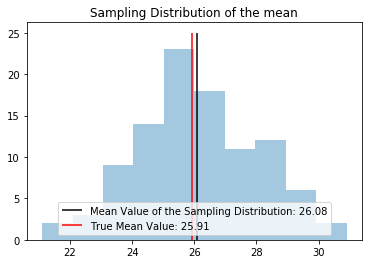

In [17]:
sns.distplot(means, kde = False, )

plt.vlines(x = np.mean(means), ymin = 0, ymax = 25, label = 'Mean Value of the Sampling Distribution: %.2f'%np.mean(means))

plt.vlines(x = accidents.mean(), ymin = 0, ymax = 25,color = 'r', label = 'True Mean Value: %.2f'%accidents.mean())

plt.title('Sampling Distribution of the mean')
plt.legend(loc = 8)
plt.show()

***In this next box we show standard deviations to specify why we have to label "sampling distribution of the MEAN" and not just sampling distribution...in this case we label "sampling distribution of the standard deviations***


In [23]:
df = accidents.to_frame() 

## Number of samples drawn from population
## How many times we conducted the experiment
N_test = 100

## Number of observations for each experiment

sample_size = 20

std = [0] * N_test
# sample generation
for i in range(N_test):
    sampled_df = df.sample(n = sample_size)
    std[i] = sampled_df.values.std()

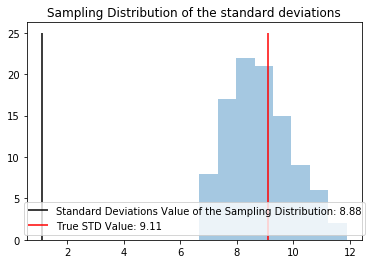

In [21]:
sns.distplot(std, kde = False, )

plt.vlines(x = np.std(std), ymin = 0, ymax = 25, label = 'Standard Deviations Value of the Sampling Distribution: %.2f'%np.mean(means))

plt.vlines(x = accidents.std(), ymin = 0, ymax = 25,color = 'r', label = 'True STD Value: %.2f'%accidents.std())

plt.title('Sampling Distribution of the standard deviations')
plt.legend(loc = 8)
plt.show()

***In this next box, we increase the number of observations. We increase to 100. The maximum would be 365 since there are only 365 days in the year. The increase in number of observations will bring the average of the means for the samples closer to the mean for the population. This is the Central Limit Theorem.***

In [26]:
df = accidents.to_frame() 

## Number of samples drawn from population
## How many times we conducted the experiment
N_test = 100

## Number of observations for each experiment

sample_size = 100

means = [0] * N_test
# sample generation
for i in range(N_test):
    sampled_df = df.sample(n = sample_size)
    means[i] = sampled_df.values.mean()

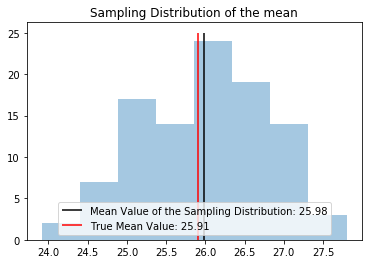

In [27]:
sns.distplot(means, kde = False, )

plt.vlines(x = np.mean(means), ymin = 0, ymax = 25, label = 'Mean Value of the Sampling Distribution: %.2f'%np.mean(means))

plt.vlines(x = accidents.mean(), ymin = 0, ymax = 25,color = 'r', label = 'True Mean Value: %.2f'%accidents.mean())

plt.title('Sampling Distribution of the mean')
plt.legend(loc = 8)
plt.show()

# Central Limit Theorem

The Central Limit Theorem states: 
>when the number of observations in a sample big enough , irrespective of the original distribution of the population, **the sampling mean distribution tends towards a normal distribution**.


__Note__ in CLT the shape of initial distribution is not important! With enough sample size we can always achieve a distribution very close to normal one.

<img src="img/clt_with_different.png" width="650">